In [2]:
%matplotlib notebook

In [135]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import datetime
from decimal import *
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
# Read in data files
bitcoin_path = "Resources/bitcoin_data.csv"
doge_path = "Resources/doge_data.csv"

# Read the bitcoin data and the dogecoin results
bitcoin_data = pd.read_csv(bitcoin_path)
doge_data = pd.read_csv(doge_path)

In [137]:
bitcoin_data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Mar 25, 2022","44,331.0","44,013.0","45,112.0","43,622.0",494.09M,0.72%
1,"Mar 24, 2022","44,013.0","42,911.0","44,251.0","42,658.0",491.66M,2.57%
2,"Mar 23, 2022","42,912.0","42,373.0","43,027.0","41,795.0",433.96M,1.27%
3,"Mar 22, 2022","42,373.0","41,022.0","43,327.9","40,893.0",537.06M,3.29%
4,"Mar 21, 2022","41,022.0","41,282.0","41,532.0","40,530.0",406.62M,-0.62%


In [138]:
bitcoin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      365 non-null    object
 1   Price     365 non-null    object
 2   Open      365 non-null    object
 3   High      365 non-null    object
 4   Low       365 non-null    object
 5   Vol.      365 non-null    object
 6   Change %  365 non-null    object
dtypes: object(7)
memory usage: 20.1+ KB


In [139]:
# Remove Change % column
bitcoin_clean = bitcoin_data.drop(columns = ["Change %"])
bitcoin_clean.head()

,Date,Price,Open,High,Low,Vol.
0,"Mar 25, 2022","44,331.0","44,013.0","45,112.0","43,622.0",494.09M
1,"Mar 24, 2022","44,013.0","42,911.0","44,251.0","42,658.0",491.66M
2,"Mar 23, 2022","42,912.0","42,373.0","43,027.0","41,795.0",433.96M
3,"Mar 22, 2022","42,373.0","41,022.0","43,327.9","40,893.0",537.06M
4,"Mar 21, 2022","41,022.0","41,282.0","41,532.0","40,530.0",406.62M


In [140]:
doge_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550
1,2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520
2,2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080
3,2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960
4,2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270


In [141]:
# Remove Adj Close column
doge_clean = doge_data.drop(columns = ["Adj Close"])
doge_clean.head()

,Date,Open,High,Low,Close,Volume
0,2017-11-09,0.001207,0.001415,0.001181,0.001415,6259550
1,2017-11-10,0.001421,0.001431,0.001125,0.001163,4246520
2,2017-11-11,0.001146,0.001257,0.001141,0.001201,2231080
3,2017-11-12,0.001189,0.001210,0.001002,0.001038,3288960
4,2017-11-13,0.001046,0.001212,0.001019,0.001211,2481270


In [142]:
# Change date format
bitcoin_clean.loc[:, "Date"] = pd.to_datetime(bitcoin_clean["Date"])
doge_clean.loc[:, "Date"] = pd.to_datetime(doge_clean["Date"])
doge_clean.head()

,Date,Open,High,Low,Close,Volume
0,2017-11-09,0.001207,0.001415,0.001181,0.001415,6259550
1,2017-11-10,0.001421,0.001431,0.001125,0.001163,4246520
2,2017-11-11,0.001146,0.001257,0.001141,0.001201,2231080
3,2017-11-12,0.001189,0.001210,0.001002,0.001038,3288960
4,2017-11-13,0.001046,0.001212,0.001019,0.001211,2481270


In [143]:
# Rename columns to reflect bitcoin or doge data
bitcoin_renamed = bitcoin_clean.rename(columns={"Price": "Bitcoin_Close", "Open": "Bitcoin_Open", "High": "Bitcoin_High", "Low": "Bitcoin_Low","Vol.": "Bitcoin_Volume"})
doge_renamed = doge_clean.rename(columns={"Open": "Dogecoin_Open", "High": "Dogecoin_High", "Low": "Dogecoin_Low", "Close": "Dogecoin_Close","Volume": "Dogecoin_Volume"})
bitcoin_renamed.head()

,Date,Bitcoin_Close,Bitcoin_Open,Bitcoin_High,Bitcoin_Low,Bitcoin_Volume
0,2022-03-25,"44,331.0","44,013.0","45,112.0","43,622.0",494.09M
1,2022-03-24,"44,013.0","42,911.0","44,251.0","42,658.0",491.66M
2,2022-03-23,"42,912.0","42,373.0","43,027.0","41,795.0",433.96M
3,2022-03-22,"42,373.0","41,022.0","43,327.9","40,893.0",537.06M
4,2022-03-21,"41,022.0","41,282.0","41,532.0","40,530.0",406.62M


In [144]:
# Reorder headers in both datasets
bitcoin_reordered = bitcoin_renamed[["Date", "Bitcoin_Open", "Bitcoin_Close", "Bitcoin_High", "Bitcoin_Low", "Bitcoin_Volume"]]
doge_reordered = doge_renamed[["Date", "Dogecoin_Open", "Dogecoin_Close", "Dogecoin_High", "Dogecoin_Low", "Dogecoin_Volume"]]
doge_reordered.head()

,Date,Dogecoin_Open,Dogecoin_Close,Dogecoin_High,Dogecoin_Low,Dogecoin_Volume
0,2017-11-09,0.001207,0.001415,0.001415,0.001181,6259550
1,2017-11-10,0.001421,0.001163,0.001431,0.001125,4246520
2,2017-11-11,0.001146,0.001201,0.001257,0.001141,2231080
3,2017-11-12,0.001189,0.001038,0.001210,0.001002,3288960
4,2017-11-13,0.001046,0.001211,0.001212,0.001019,2481270


In [145]:
# Add column for blockchain symbols
bitcoin_add_column = bitcoin_reordered.assign(Bitcoin_Symbol = "BTC")
doge_add_column = doge_reordered.assign(Doge_Symbol = "DOGE")
doge_add_column.head()

,Date,Dogecoin_Open,Dogecoin_Close,Dogecoin_High,Dogecoin_Low,Dogecoin_Volume,Doge_Symbol
0,2017-11-09,0.001207,0.001415,0.001415,0.001181,6259550,DOGE
1,2017-11-10,0.001421,0.001163,0.001431,0.001125,4246520,DOGE
2,2017-11-11,0.001146,0.001201,0.001257,0.001141,2231080,DOGE
3,2017-11-12,0.001189,0.001038,0.001210,0.001002,3288960,DOGE
4,2017-11-13,0.001046,0.001211,0.001212,0.001019,2481270,DOGE


In [146]:
# Reorder columns again and save back to the reordered variable
bitcoin_reordered = bitcoin_add_column[["Date", "Bitcoin_Symbol", "Bitcoin_Open", "Bitcoin_Close", "Bitcoin_High", "Bitcoin_Low", "Bitcoin_Volume"]]
doge_reordered = doge_add_column[["Date", "Doge_Symbol", "Dogecoin_Open", "Dogecoin_Close", "Dogecoin_High", "Dogecoin_Low", "Dogecoin_Volume"]]
bitcoin_reordered.head()

,Date,Bitcoin_Symbol,Bitcoin_Open,Bitcoin_Close,Bitcoin_High,Bitcoin_Low,Bitcoin_Volume
0,2022-03-25,BTC,"44,013.0","44,331.0","45,112.0","43,622.0",494.09M
1,2022-03-24,BTC,"42,911.0","44,013.0","44,251.0","42,658.0",491.66M
2,2022-03-23,BTC,"42,373.0","42,912.0","43,027.0","41,795.0",433.96M
3,2022-03-22,BTC,"41,022.0","42,373.0","43,327.9","40,893.0",537.06M
4,2022-03-21,BTC,"41,282.0","41,022.0","41,532.0","40,530.0",406.62M


In [147]:
# Merge cleaned bitcoin and dogecoin datasets
blockchain_data = pd.merge(bitcoin_reordered, doge_reordered, on = "Date",)
blockchain_data.head()

,Date,Bitcoin_Symbol,Bitcoin_Open,Bitcoin_Close,Bitcoin_High,Bitcoin_Low,Bitcoin_Volume,Doge_Symbol,Dogecoin_Open,Dogecoin_Close,Dogecoin_High,Dogecoin_Low,Dogecoin_Volume
0,2022-03-25,BTC,"44,013.0","44,331.0","45,112.0","43,622.0",494.09M,DOGE,0.136681,0.132080,0.137222,0.131993,1023110400
1,2022-03-24,BTC,"42,911.0","44,013.0","44,251.0","42,658.0",491.66M,DOGE,0.129722,0.136550,0.140605,0.128455,2017926806
2,2022-03-23,BTC,"42,373.0","42,912.0","43,027.0","41,795.0",433.96M,DOGE,0.122487,0.129727,0.130713,0.121361,998922753
3,2022-03-22,BTC,"41,022.0","42,373.0","43,327.9","40,893.0",537.06M,DOGE,0.119333,0.122481,0.125350,0.119014,610507111
4,2022-03-21,BTC,"41,282.0","41,022.0","41,532.0","40,530.0",406.62M,DOGE,0.119146,0.119339,0.121332,0.118306,439486516


In [148]:
# Reset index to date
blockchain_data = blockchain_data.set_index("Date")
blockchain_data.head()

,Bitcoin_Symbol,Bitcoin_Open,Bitcoin_Close,Bitcoin_High,Bitcoin_Low,Bitcoin_Volume,Doge_Symbol,Dogecoin_Open,Dogecoin_Close,Dogecoin_High,Dogecoin_Low,Dogecoin_Volume
Date,,,,,,,,,,,,
2022-03-25,BTC,"44,013.0","44,331.0","45,112.0","43,622.0",494.09M,DOGE,0.136681,0.132080,0.137222,0.131993,1023110400
2022-03-24,BTC,"42,911.0","44,013.0","44,251.0","42,658.0",491.66M,DOGE,0.129722,0.136550,0.140605,0.128455,2017926806
2022-03-23,BTC,"42,373.0","42,912.0","43,027.0","41,795.0",433.96M,DOGE,0.122487,0.129727,0.130713,0.121361,998922753
2022-03-22,BTC,"41,022.0","42,373.0","43,327.9","40,893.0",537.06M,DOGE,0.119333,0.122481,0.125350,0.119014,610507111
2022-03-21,BTC,"41,282.0","41,022.0","41,532.0","40,530.0",406.62M,DOGE,0.119146,0.119339,0.121332,0.118306,439486516


In [151]:
for col in blockchain_data.columns:
    if "Symbol" not in col: #and "Volume" not in col:
        blockchain_data[col] = blockchain_data[col].astype(str).str.replace(",","")
        blockchain_data[col] = blockchain_data[col].astype(str).str.replace(".","")
        blockchain_data[col] = blockchain_data[col].astype(str).str.replace("M","0000")
        blockchain_data[col] = blockchain_data[col].astype(str).str.replace("B","000000000")
        blockchain_data[col] = blockchain_data[col].astype(str).str.replace("K","00")
        blockchain_data[col] = pd.to_numeric(blockchain_data[col])
blockchain_data.head()

/var/folders/bn/zgf22xp97l979lg_d5cpjykr0000gn/T/ipykernel_31623/1876343858.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  blockchain_data[col] = blockchain_data[col].astype(str).str.replace(".","")


,Bitcoin_Symbol,Bitcoin_Open,Bitcoin_Close,Bitcoin_High,Bitcoin_Low,Bitcoin_Volume,Doge_Symbol,Dogecoin_Open,Dogecoin_Close,Dogecoin_High,Dogecoin_Low,Dogecoin_Volume
Date,,,,,,,,,,,,
2022-03-25,BTC,440130,443310,451120,436220,494090000,DOGE,136681,13208,137222,131993,1023110400
2022-03-24,BTC,429110,440130,442510,426580,491660000,DOGE,129722,13655,140605,128455,2017926806
2022-03-23,BTC,423730,429120,430270,417950,433960000,DOGE,122487,129727,130713,121361,998922753
2022-03-22,BTC,410220,423730,433279,408930,537060000,DOGE,119333,122481,12535,119014,610507111
2022-03-21,BTC,412820,410220,415320,405300,406620000,DOGE,119146,119339,121332,118306,439486516


In [87]:
# Convert blockchain symbol columns to strings
#blockchain_string = blockchain_data.astype({"Doge_Symbol": str, "Bitcoin_Symbol": str})
#blockchain_string.head()

,Bitcoin_Symbol,Bitcoin_Open,Bitcoin_Close,Bitcoin_High,Bitcoin_Low,Bitcoin_Volume,Doge_Symbol,Dogecoin_Open,Dogecoin_Close,Dogecoin_High,Dogecoin_Low,Dogecoin_Volume
Date,,,,,,,,,,,,
2022-03-25,BTC,"44,013.0","44,331.0","45,112.0","43,622.0",494.09M,DOGE,0.136681,0.132080,0.137222,0.131993,1023110400
2022-03-24,BTC,"42,911.0","44,013.0","44,251.0","42,658.0",491.66M,DOGE,0.129722,0.136550,0.140605,0.128455,2017926806
2022-03-23,BTC,"42,373.0","42,912.0","43,027.0","41,795.0",433.96M,DOGE,0.122487,0.129727,0.130713,0.121361,998922753
2022-03-22,BTC,"41,022.0","42,373.0","43,327.9","40,893.0",537.06M,DOGE,0.119333,0.122481,0.125350,0.119014,610507111
2022-03-21,BTC,"41,282.0","41,022.0","41,532.0","40,530.0",406.62M,DOGE,0.119146,0.119339,0.121332,0.118306,439486516


In [129]:
#variable_1 = blockchain_data["Bitcoin_Close"].iloc[:,1]
#variable_2 = blockchain_data["Dogecoin_Close"].iloc[:,8]
#correlation = st.pearsonr(variable_1, variable_2)
#print(f"The correlation is {round(correlation[0],2)}")

IndexingError: Too many indexers

In [94]:
# Generate correlation coefficient
#bitcoin_data = blockchain_data.groupby("Bitcoin_Symbol")
#bitcoin_data.head()

,Bitcoin_Symbol,Bitcoin_Open,Bitcoin_Close,Bitcoin_High,Bitcoin_Low,Bitcoin_Volume,Doge_Symbol,Dogecoin_Open,Dogecoin_Close,Dogecoin_High,Dogecoin_Low,Dogecoin_Volume
Date,,,,,,,,,,,,
2022-03-25,BTC,"44,013.0","44,331.0","45,112.0","43,622.0",494.09M,DOGE,0.136681,0.132080,0.137222,0.131993,1023110400
2022-03-24,BTC,"42,911.0","44,013.0","44,251.0","42,658.0",491.66M,DOGE,0.129722,0.136550,0.140605,0.128455,2017926806
2022-03-23,BTC,"42,373.0","42,912.0","43,027.0","41,795.0",433.96M,DOGE,0.122487,0.129727,0.130713,0.121361,998922753
2022-03-22,BTC,"41,022.0","42,373.0","43,327.9","40,893.0",537.06M,DOGE,0.119333,0.122481,0.125350,0.119014,610507111
2022-03-21,BTC,"41,282.0","41,022.0","41,532.0","40,530.0",406.62M,DOGE,0.119146,0.119339,0.121332,0.118306,439486516


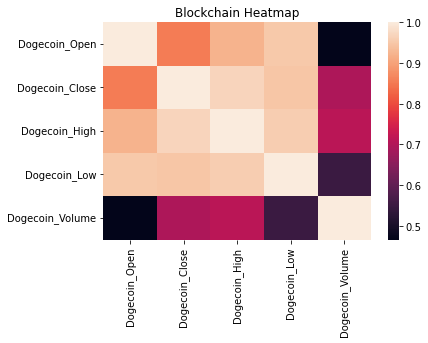

In [100]:
# Create a heatmap of the blockchain combined dataset data
sns.heatmap(blockchain_data.corr());
plt.title('Blockchain Heatmap')
plt.show()
#plt.savefig("Visualizations/Heatmap/CA_apt.png", bbox_inches="tight")

In [102]:
# Calculate outliers for bitcoin
bitcoin_price = blockchain_string["Bitcoin_Close"]
quartiles = bitcoin_price.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [77]:
# Calculate outliers for dogecoin
dogecoin_price = blockchain_string["Dogecoin_Close"]
quartiles = dogecoin_price.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Values below 0.10471850000000002 could be outliers.
Values above 0.1371625 could be outliers.
